In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
import plotly.express as px

In [83]:
data = pd.read_csv('data/all-data.csv',encoding='latin-1')
data.columns=['sentiment','messages']

In [84]:
print(data.columns)

Index(['sentiment', 'messages'], dtype='object')


In [85]:
# Counts of sentiments
# Company/entity extraction
# Locations
# Topic

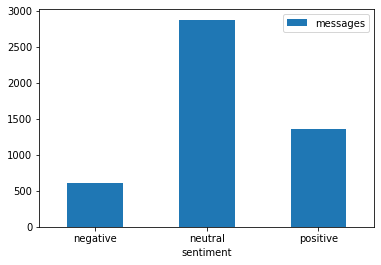

In [86]:
# Counts of sentiments
counts = (data.groupby(['sentiment'])).count()
ax = counts.plot.bar(rot=0)

In [89]:
data["new_message"] = data['messages'].str.lower().str.replace('[^\w\s]','')
word_counts = data.new_message.str.split(expand=True).stack().value_counts().reset_index()
word_counts.columns = ['Word', 'Frequency'] 

/var/folders/bw/24j2lsnd1nn7df6hl8h1xt0m0000gn/T/ipykernel_9063/1975483439.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["new_message"] = data['messages'].str.lower().str.replace('[^\w\s]','')


In [90]:
nlp = spacy.load("en_core_web_sm")

/Users/beenita.shah/CodeBase/.virtualenvs/test/lib/python3.9/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [92]:
data['tagged'] = data.apply(lambda x: nlp(x['new_message']),axis=1)

In [93]:
data['entities'] = data.apply(lambda x: [X.text for X in x['tagged'].ents if(X.label_=='ORG')],axis=1)

In [97]:
entities = [item.replace(' ', '') for sublist in data['entities'].values.tolist() for item in sublist]

In [98]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

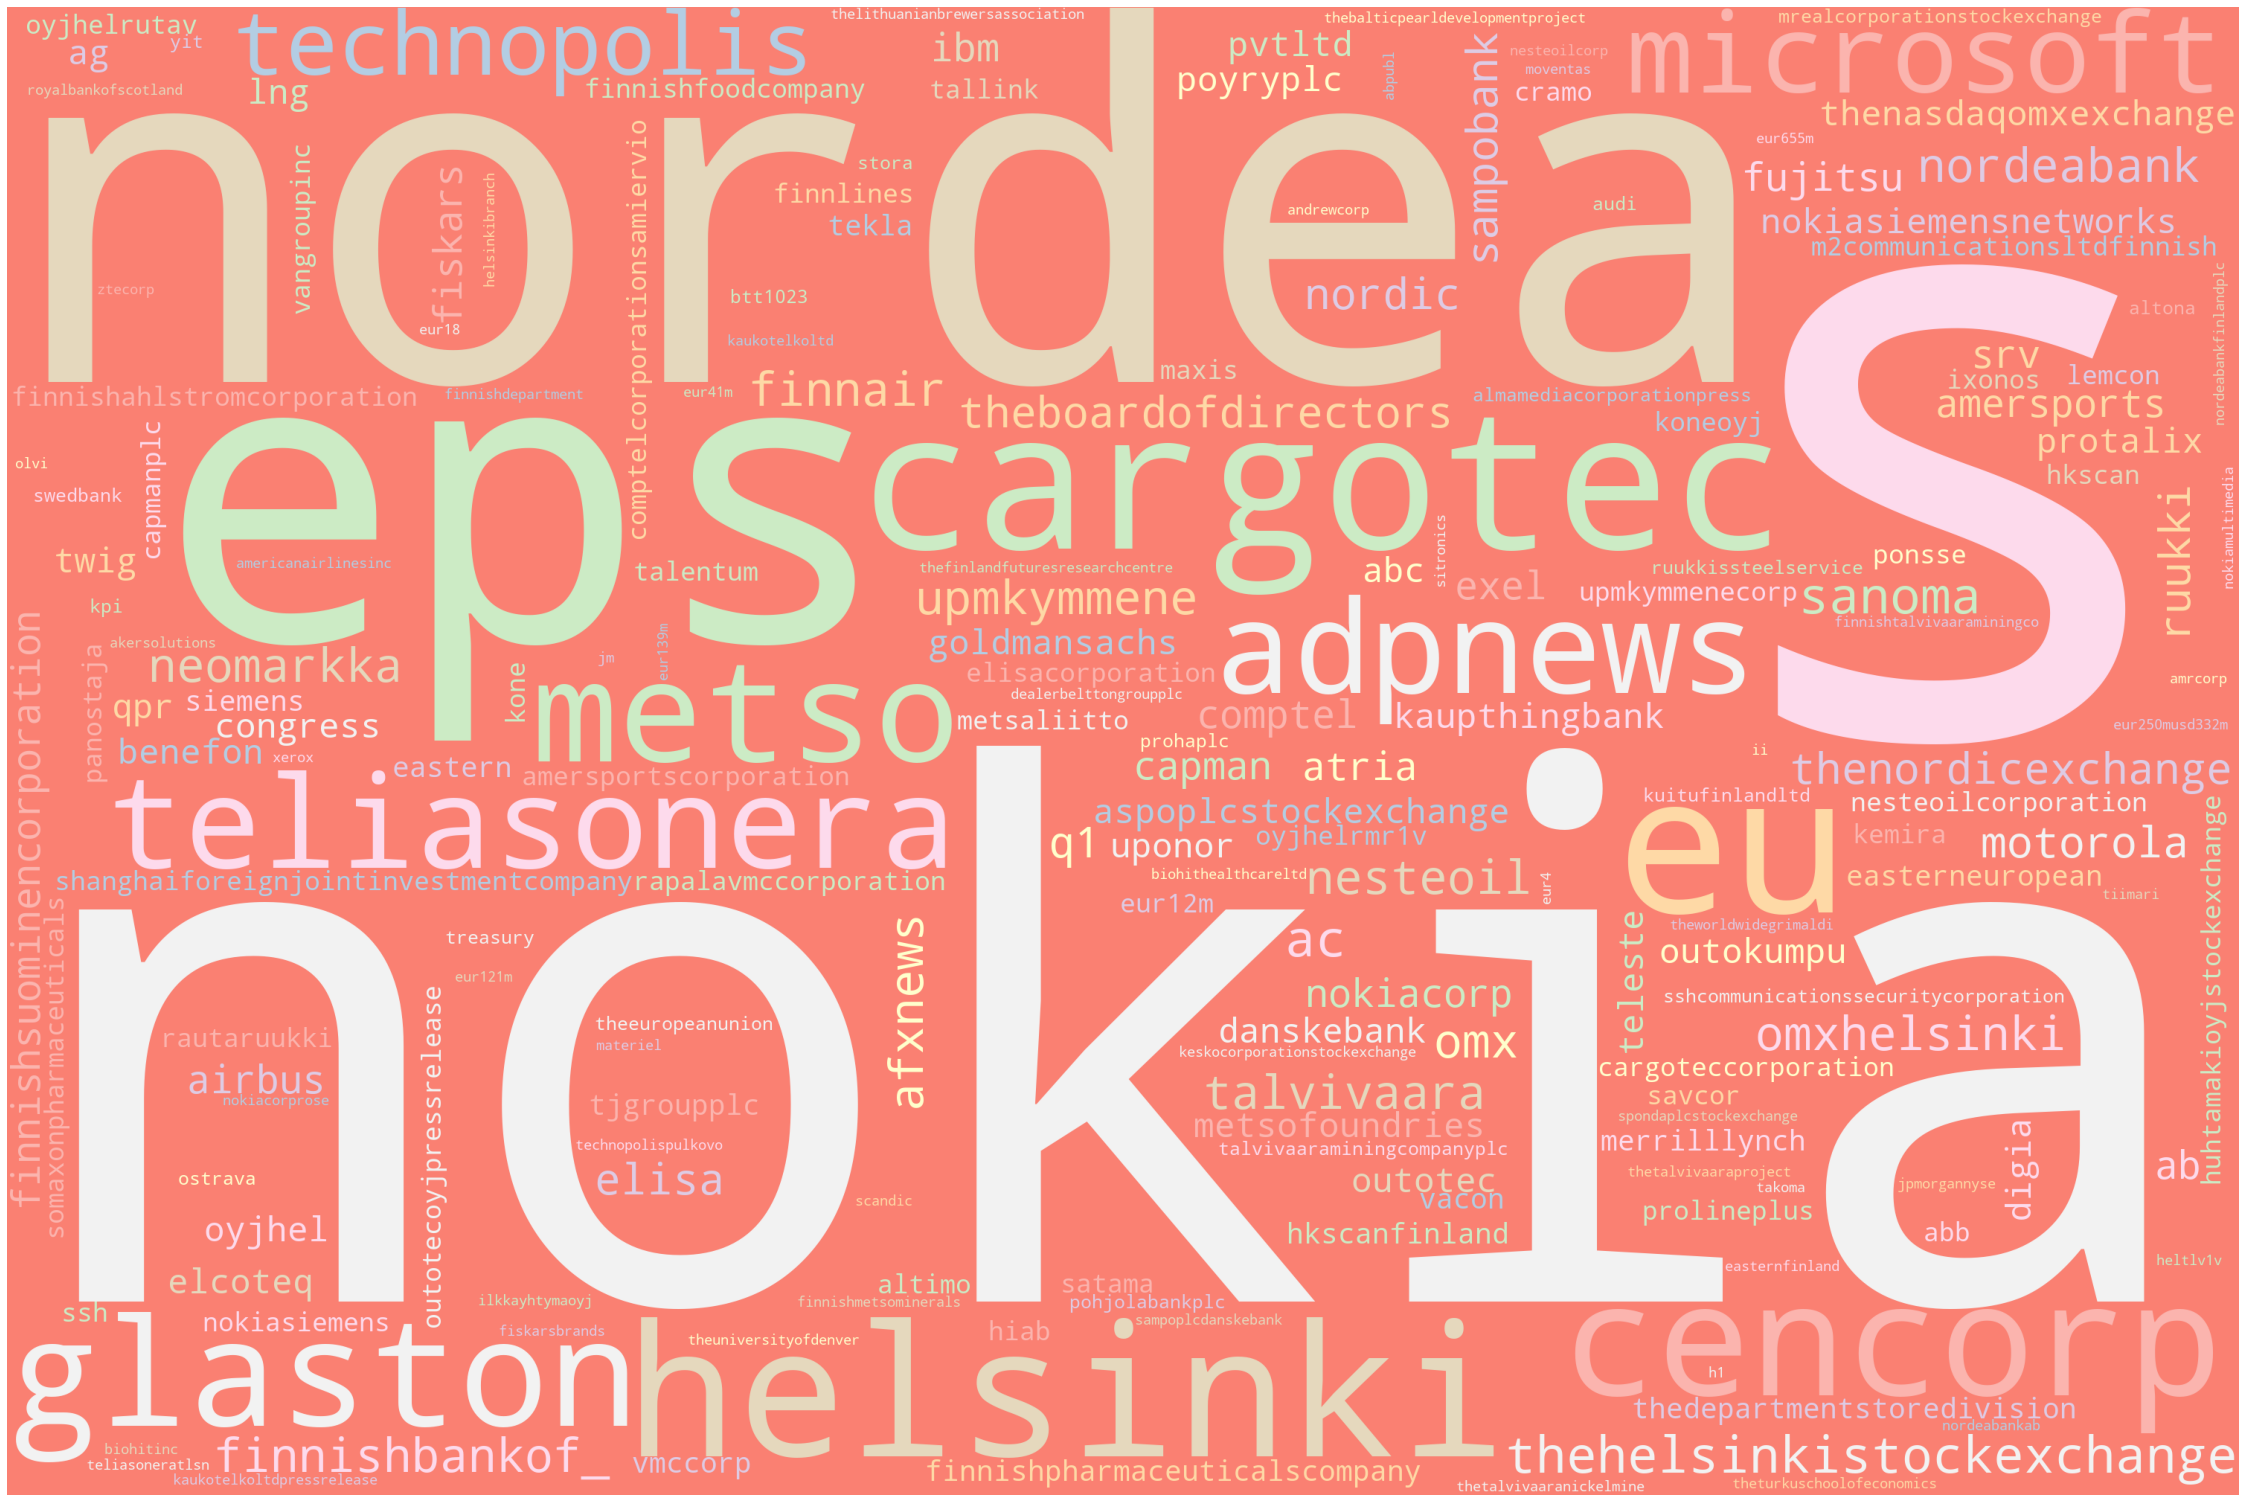

In [99]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate((",").join(entities))
# Plot
plot_cloud(wordcloud)

In [102]:
data['tagged'] = data.apply(lambda x: nlp(x['messages']),axis=1)
data['nationalities'] = data.apply(lambda x: [X.text for X in x['tagged'].ents if(X.label_=='NORP')],axis=1)


In [ ]:
nationalities = [item for sublist in data['nationalities'].values.tolist() for item in sublist]
nation_counts = Counter(nationalities)
counts_df = pd.DataFrame.from_dict({'NORP':dict(nation_counts).keys(), 'Counts':dict(nation_counts).values()})
print(counts_df.head)

In [138]:
fig = px.scatter(counts_df[1:], x="NORP", y="Counts", size="Counts", color="NORP",log_y=True)
fig.show()